## CS-430 Assignment 2: Exploratory Data Analysis and Regression on Air Quality Data

### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Explore the Dataset

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Assignment2/AirQuality_Data.csv')

In [3]:
data.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34314 non-null  float64
 6   PM10     34511 non-null  float64
 7   SO2      34401 non-null  float64
 8   NO2      33463 non-null  float64
 9   CO       31867 non-null  float64
 10  O3       34400 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


### Imputing Missing Values

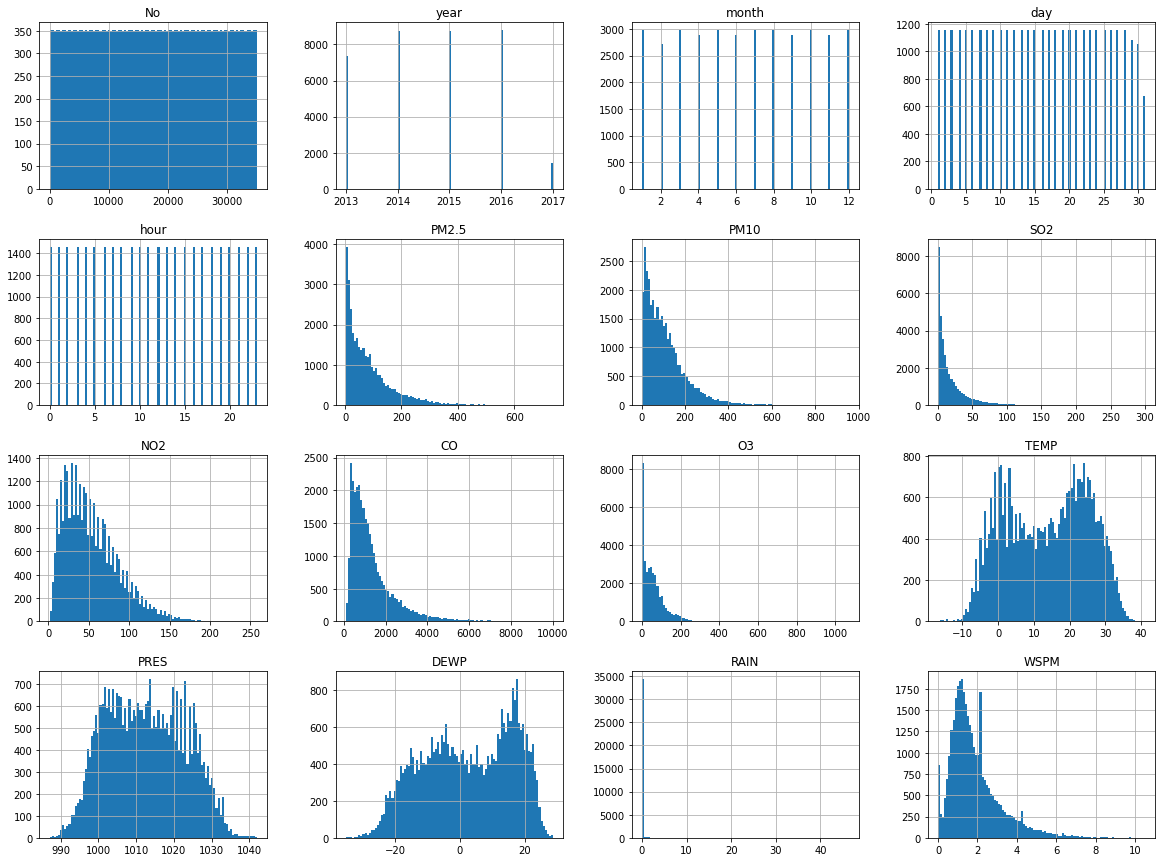

In [5]:
data.hist(bins=100, figsize=(20,15))
plt.show()

In [6]:
data.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       750
PM10        553
SO2         663
NO2        1601
CO         3197
O3          664
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [7]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'most_frequent')

In [8]:
data['PM2.5'] = imputer.fit_transform(data[['PM2.5']])
data['PM10'] = imputer.fit_transform(data[['PM10']])
data['SO2'] = imputer.fit_transform(data[['SO2']])
data['NO2'] = imputer.fit_transform(data[['NO2']])
data['CO'] = imputer.fit_transform(data[['CO']])
data['O3'] = imputer.fit_transform(data[['O3']])
data['TEMP'] = imputer.fit_transform(data[['TEMP']])
data['PRES'] = imputer.fit_transform(data[['PRES']])
data['DEWP'] = imputer.fit_transform(data[['DEWP']])
data['RAIN'] = imputer.fit_transform(data[['RAIN']])
data['wd'] = imputer.fit_transform(data[['wd']])
data['WSPM'] = imputer.fit_transform(data[['WSPM']])

In [9]:
sns.pairplot(data=data)

Output hidden; open in https://colab.research.google.com to view.

### Correlation Matrix

In [10]:
corr_matrix = data.corr()
print(corr_matrix)

             No          year         month           day          hour  \
No     1.000000  9.695331e-01  4.318051e-02  1.776442e-02  6.838683e-04   
year   0.969533  1.000000e+00 -2.020099e-01 -5.569082e-03  1.164482e-15   
month  0.043181 -2.020099e-01  1.000000e+00  1.052232e-02  4.724770e-16   
day    0.017764 -5.569082e-03  1.052232e-02  1.000000e+00 -4.489555e-17   
hour   0.000684  1.164482e-15  4.724770e-16 -4.489555e-17  1.000000e+00   
PM2.5 -0.009810 -1.336139e-02  1.479046e-02  1.122336e-03 -3.256123e-03   
PM10  -0.003952 -2.820737e-03 -6.173162e-03  2.069448e-02  2.639247e-02   
SO2   -0.242248 -1.924548e-01 -1.858382e-01 -2.500178e-04 -1.035403e-02   
NO2   -0.016868 -5.016503e-02  1.385290e-01 -1.122327e-02 -7.127844e-02   
CO     0.084656  7.462285e-02  3.481031e-02 -1.442645e-02 -3.426909e-02   
O3    -0.097268 -6.817157e-02 -1.100091e-01 -6.496178e-03  2.825317e-01   
TEMP  -0.119716 -1.495362e-01  1.328823e-01  1.550963e-02  1.419695e-01   
PRES   0.173580  1.744134

### Based off the graphs and the correlation matrix the variables that contribute to PM2.5 are PM10, SO2, NO2, CO, O3, TEMP, DEWP, and WSPM

### The values of "No", "year", "month", "day", "hour", "PRES", "station", "wd", and "RAIN" contribute very little or not at all to the value of PM2.5 so they can be dropped

In [11]:
data = data.drop(['No', 'year', 'month', 'day', 'hour', 'PRES', 'wd', 'RAIN', 'station'], axis = 1)

In [12]:
data.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,DEWP,WSPM
0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,-21.4,5.7
1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,-22.1,3.9
2,7.0,7.0,2.0,17.0,300.0,60.0,-1.2,-24.6,5.3
3,3.0,3.0,5.0,18.0,300.0,2.0,-1.4,-25.5,4.9
4,3.0,3.0,7.0,20.0,200.0,84.0,-1.9,-24.5,3.2


### Normalizing the Data

In [13]:
from sklearn.preprocessing import MinMaxScaler
MM = MinMaxScaler()

In [14]:
data_scaled = MM.fit_transform(data)

In [15]:
data_scaled

array([[0.00817439, 0.00734523, 0.00905662, ..., 0.28151986, 0.21684867,
        0.54285714],
       [0.0013624 , 0.00209864, 0.00905662, ..., 0.27806563, 0.20592824,
        0.37142857],
       [0.00544959, 0.00524659, 0.00572011, ..., 0.26943005, 0.16692668,
        0.5047619 ],
       ...,
       [0.02724796, 0.0587618 , 0.01572964, ..., 0.47668394, 0.34321373,
        0.1047619 ],
       [0.02724796, 0.05351522, 0.02907568, ..., 0.47150259, 0.34945398,
        0.11428571],
       [0.03678474, 0.07240294, 0.0357487 , ..., 0.43868739, 0.30265211,
        0.12380952]])

### Splitting the Data into training and test sets

In [16]:
from sklearn.model_selection import train_test_split

X = data.drop(['PM2.5'], axis = 1)
y = data['PM2.5']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 40)

### Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

Linear_regression_model = regressor.fit(X_train, y_train)

In [18]:
Linear_regression_model.score(X_train, y_train)

0.8474922990412334

In [19]:
Linear_regression_model.score(X_test, y_test)

0.8513078994915643

In [20]:
from sklearn.metrics import mean_squared_error
y_pred = Linear_regression_model.predict(X_test)
LR_RMSE = mean_squared_error(y_test, y_pred, squared = False)
print(LR_RMSE)

32.993797488368585


### Stochastic Gradient Descent

In [21]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [22]:
reg = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3, eta0=.08))
reg.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor(eta0=0.08))])

In [23]:
y_pred_SDG = reg.predict(X_test)
SGD_RSME = mean_squared_error(y_true = y_test, y_pred = y_pred_SDG, squared = False)
print(SGD_RSME)

33.3552603341225


In [24]:
reg.score(X_train, y_train)

0.8442983125032206

In [25]:
reg.score(X_test, y_test)

0.8480320668107026

### Ridge Regression

In [26]:
from sklearn.linear_model import Ridge
Ridge_model = Ridge(alpha=2, max_iter= 1000, tol=0.5)
Ridge_model.fit(X_train, y_train)

Ridge(alpha=2, max_iter=1000, tol=0.5)

In [27]:
Ridge_model.score(X_train, y_train)

0.8474922990404419

In [28]:
Ridge_model.score(X_test, y_test)

0.8513078731081105

In [29]:
y_pred = Ridge_model.predict(X_test)
Ridge_RMSE = mean_squared_error(y_test, y_pred, squared = False)
print(Ridge_RMSE)

32.99380041552575


### Lasso Regression

In [30]:
from sklearn.linear_model import Lasso
Lasso_model = Lasso(alpha = 100, max_iter = 1000, tol = 0.5)
Lasso_model.fit(X_train, y_train)

Lasso(alpha=100, tol=0.5)

In [31]:
Lasso_model.score(X_train, y_train)

0.826209675896704

In [32]:
Lasso_model.score(X_test, y_test)

0.8269273081564407

In [33]:
y_pred = Lasso_model.predict(X_test)

Lasso_RMSE = mean_squared_error(y_test, y_pred, squared = False)
print(Lasso_RMSE)

35.59611739145444


### ElasticNet

In [34]:
from sklearn.linear_model import ElasticNet

ElasticNet_model = ElasticNet(alpha=0.01, l1_ratio=0.5)
ElasticNet_model.fit(X_train, y_train)

ElasticNet(alpha=0.01)

In [35]:
ElasticNet_model.score(X_train, y_train)

0.8474922856463964

In [36]:
ElasticNet_model.score(X_test, y_test)

0.8513045291704133

In [37]:
y_pred = ElasticNet_model.predict(X_test)

ElasticNet_RMSE = mean_squared_error(y_test, y_pred, squared = False)
print(ElasticNet_RMSE)

32.99417141227922



### PrettyTable

In [38]:
from prettytable import PrettyTable

In [39]:
myTable = PrettyTable(['Model', 'Training_score', 'Test_score', 'RMSE'])

myTable.add_row(["Linear Regression", Linear_regression_model.score(X_train,y_train), Linear_regression_model.score(X_test, y_test), LR_RMSE])

myTable.add_row(["Stochastic Gradient Descent", reg.score(X_train, y_train), reg.score(X_test, y_test), SGD_RSME])

myTable.add_row(["Ridge", Ridge_model.score(X_train, y_train), Ridge_model.score(X_test, y_test), Ridge_RMSE])

myTable.add_row(["Lasso", Lasso_model.score(X_train, y_train), Lasso_model.score(X_test, y_test), Lasso_RMSE])

myTable.add_row(["ElasticNet", ElasticNet_model.score(X_train, y_train), ElasticNet_model.score(X_test, y_test), ElasticNet_RMSE])

In [40]:
print(myTable)

+-----------------------------+--------------------+--------------------+--------------------+
|            Model            |   Training_score   |     Test_score     |        RMSE        |
+-----------------------------+--------------------+--------------------+--------------------+
|      Linear Regression      | 0.8474922990412334 | 0.8513078994915643 | 32.993797488368585 |
| Stochastic Gradient Descent | 0.8442983125032206 | 0.8480320668107026 |  33.3552603341225  |
|            Ridge            | 0.8474922990404419 | 0.8513078731081105 | 32.99380041552575  |
|            Lasso            | 0.826209675896704  | 0.8269273081564407 | 35.59611739145444  |
|          ElasticNet         | 0.8474922856463964 | 0.8513045291704133 | 32.99417141227922  |
+-----------------------------+--------------------+--------------------+--------------------+


## Based off the table it is clear that each Regression model is relatively similar in terms of the three data points used to test the model. This proves that the data is properly fitted and the scores that were calculated are the best possible